# 다중분류
## iris

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/iris.csv")
df.shape

(150, 6)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df = df.drop(['Id'], axis=1)

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
# 다중분류할 때는 원핫 인코딩 진행

from tensorflow import keras

y = keras.utils.to_categorical(y)

In [20]:
type(y)

numpy.ndarray

In [21]:
# 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2022, shuffle=True)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [22]:
y_train[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [23]:
# 스케일링 생략


In [ ]:
X_train = X_train.values  # 스케일링하면 ndarray타입이 되는데 안해서 임의로 바꿔줌
X_train[:5]

In [36]:
from tensorflow.keras import layers

model = keras.Sequential([
      layers.Dense(16, input_shape = (4,), activation = 'relu'),
      layers.Dense(16, activation = 'relu'),
      layers.Dense(3, activation = 'softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 모델 컴파일
# 손실함수, 옵티마이저

model.compile(loss='categorical_crossentropy', # 다중분류 loss : categorical_crossentropy
              optimizer = 'adam',
              metrics = ['acc'])  

In [39]:
EPOCHS = 200
BATCH_SIZE = 16

history = model .fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, batch_size = BATCH_SIZE)

Epoch 1/200
6/6 [==============================] - 2s 60ms/step - loss: 1.1546 - acc: 0.3438 - val_loss: 1.1582 - val_acc: 0.3750
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0916 - acc: 0.3438 - val_loss: 1.1106 - val_acc: 0.2083
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 1.0405 - acc: 0.3333 - val_loss: 1.0764 - val_acc: 0.2083
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0025 - acc: 0.3333 - val_loss: 1.0360 - val_acc: 0.2083
Epoch 5/200
6/6 [==============================] - 0s 13ms/step - loss: 0.9657 - acc: 0.3542 - val_loss: 0.9827 - val_acc: 0.3750
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.9297 - acc: 0.5417 - val_loss: 0.9354 - val_acc: 0.5833
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8965 - acc: 0.6458 - val_loss: 0.8976 - val_acc: 0.5833
Epoch 8/200
6/6 [==============================] - 0s 11ms/step - loss: 0.8676 - acc: 0.6562 

In [34]:
# 결과 시각화 함수

def plot_history(history):
  hist = history.history
  plt.figure(figsize=(8,5))
  plt.subplot(1,2,1)
  plt.plot(history.epoch, hist['loss'], label="loss")
  plt.plot(history.epoch, hist['val_loss'], label='val_loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(history.epoch, hist['acc'], label="acc")
  plt.plot(history.epoch, hist['val_acc'], label='val_acc')
  plt.legend()
  plt.show()

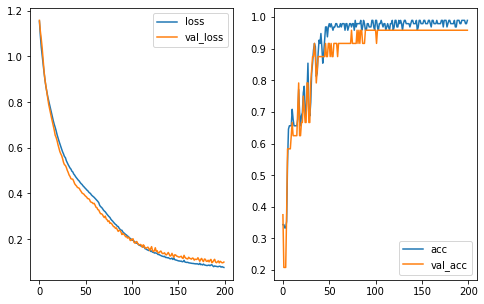

In [40]:
plot_history(history)

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 355ms/step - loss: 0.1001 - acc: 0.9667


[0.10012368857860565, 0.9666666388511658]

In [47]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[2.1175708e-07, 6.7304554e-03, 9.9326926e-01],
       [2.0385178e-08, 3.4044352e-03, 9.9659556e-01],
       [9.9833125e-01, 1.6687353e-03, 2.1087454e-10],
       [1.0325055e-05, 1.4211528e-01, 8.5787439e-01],
       [9.9970931e-01, 2.9064648e-04, 5.2822148e-12]], dtype=float32)

In [49]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 2])

In [51]:
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2])

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

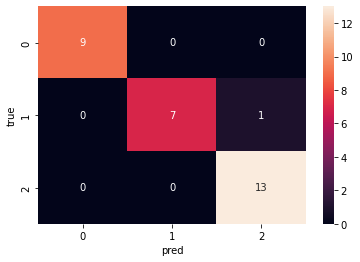

In [53]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cfm, annot=True)
plt.xlabel('pred')
plt.ylabel('true')
plt.show()